# Input data

Text(0, 0.5, 'Second feature')

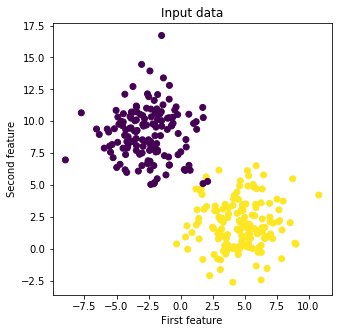

In [56]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X,y = make_blobs(n_samples = 300, random_state = 42, centers = 2, cluster_std = 2)

plt.figure(figsize=(5,5))
plt.title("Input data")
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel("First feature")
plt.ylabel("Second feature")

# Train and test separation

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("Shape of train data: {}".format(X_train.shape))
print("Shape of test data: {}".format(X_test.shape))

Shape of train data: (225, 2)
Shape of test data: (75, 2)


# Neural network using Keras

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(2,), name='make_blobs')
x = layers.Dense(2, activation='relu', name='dense_1')(inputs)
x = layers.Dense(3, activation='relu', name='dense_2')(x)
outputs = layers.Dense(2, activation='softmax', name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Предобработаем данные (это массивы Numpy)
X_train = X_train.reshape(225, 2).astype('float32')
X_test = X_test.reshape(75, 2).astype('float32')

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Резервируем 200 примеров для валидации
X_val = X_train[200:]
y_val = y_train[200:]
X_train = X_train[:200]
y_train = y_train[:200]

# Укажем конфигурацию обучения (оптимизатор, функция потерь, метрики)
model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
              # Минимизируемая функция потерь
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # Список метрик для мониторинга
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Обучим модель
print('# Обучаем модель на тестовых данных')
history = model.fit(X_train, y_train,
                    batch_size=2,
                    epochs=10,
                    # Мы передаем валидационные данные для
                    # мониторинга потерь и метрик на этих данных
                    # в конце каждой эпохи
                    validation_data=(X_val, y_val))

# Обучаем модель на тестовых данных
Train on 200 samples, validate on 25 samples
Epoch 1/10
200/200 [==============================] - 0s 2ms/sample - loss: 0.8003 - sparse_categorical_accuracy: 0.1500 - val_loss: 0.7352 - val_sparse_categorical_accuracy: 0.0800
Epoch 2/10
200/200 [==============================] - 0s 714us/sample - loss: 0.7119 - sparse_categorical_accuracy: 0.1850 - val_loss: 0.6852 - val_sparse_categorical_accuracy: 0.5200
Epoch 3/10
200/200 [==============================] - 0s 725us/sample - loss: 0.6513 - sparse_categorical_accuracy: 0.5000 - val_loss: 0.6226 - val_sparse_categorical_accuracy: 0.5200
Epoch 4/10
200/200 [==============================] - 0s 1ms/sample - loss: 0.5672 - sparse_categorical_accuracy: 0.8100 - val_loss: 0.5379 - val_sparse_categorical_accuracy: 0.9600
Epoch 5/10
200/200 [==============================] - 0s 856us/sample - loss: 0.4725 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.4512 - val_sparse_categorical_accuracy: 1.0000
Epo

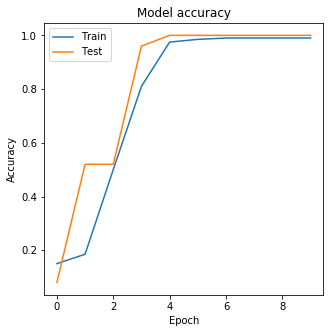

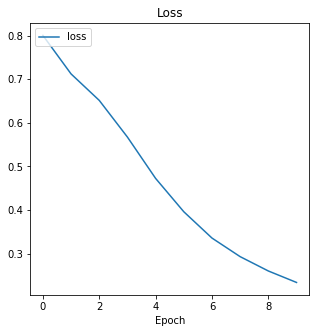

In [59]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(5,5))
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.figure(figsize=(5,5))
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')

In [60]:
# Сгенерируем прогнозы (вероятности - выходные данные последнего слоя)
predictions = model.predict(X_test)

y_pred = []
for item in predictions:
    y_pred.append(np.argmax(item))

# Results

Text(0, 0.5, 'Second feature')

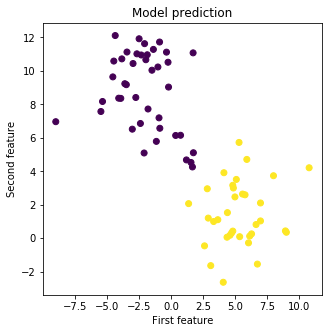

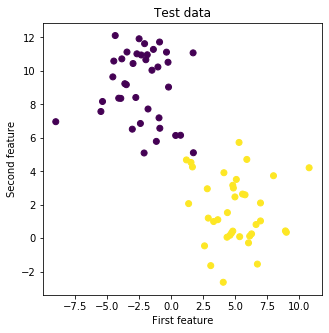

In [53]:
plt.figure(figsize=(5,5))
plt.title("Model prediction")
plt.scatter(X_test[:,0], X_test[:,1], c = y_pred)
plt.xlabel("First feature")
plt.ylabel("Second feature")

plt.figure(figsize=(5,5))
plt.title("Test data")
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")